# Importing libraries

In [51]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading dataset

In [52]:
df_mat=pd.read_csv('Dataset\student-mat.csv',sep=';')


In [53]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Preprocessing

* Information

In [54]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* Columns

In [55]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

* Value of each category in a column

In [56]:
for i in df_mat.columns:
    print(df_mat[i].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1  

# Data is imbalanced, We will use Tree based models

* Removing Outliers,if any

In [57]:
result = df_mat.select_dtypes(include='number')

In [58]:
for i in result.columns:
    percentile25 = df_mat[i].quantile(0.25) # 25 th percentile of my data
    percentile75 = df_mat[i].quantile(0.75) # 75 th percentile of my data
    
    iqr = percentile75-percentile25 # Defined a range
    
    upper_limit = percentile75 + 1.5 * iqr # Defining Upper Limit
    lower_limit = percentile25 - 1.5 * iqr # Defining Lower Limit
    
    df_mat[df_mat[i] > upper_limit]
    df_mat[df_mat[i] < lower_limit]
    
    df = df_mat[df_mat[i] < upper_limit ] # datapoints less than my upper limit
    df = df_mat[df_mat[i] > lower_limit ] # datapoints greater than my lower limit
    


In [59]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [60]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Obj dtype to numeric dtype

In [61]:
col=['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
dic={'no':0,'yes':1}

for i in col:
    
    df_mat[i]=df_mat[i].map(dic)

In [62]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

* schoolsup    -0.082788
* health       -0.061335
* Dalc         -0.054660
* Walc         -0.051939
* famsup       -0.039157
* freetime      0.011307

**These features are having very less correlation, Lets drop them**

In [63]:
df.drop(columns=['schoolsup','health','Dalc','Walc','famsup','freetime'],inplace=True)

In [64]:
df.drop(columns=['nursery','romantic'],inplace=True)

In [65]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,paid,activities,higher,internet,famrel,goout,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,yes,no,4,4,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,yes,5,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,yes,yes,4,2,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,yes,3,2,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,yes,no,4,2,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,yes,no,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,no,yes,yes,2,5,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,yes,no,5,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,no,yes,yes,4,1,0,11,12,10


1. **See value counts of F job and M job ,'other' is almost equal or greater than rest of value. and here other is generic value. For betterment lets drop these columns**

2. **We should also drop school as out of 2 school, 1 has 70% more enrollement**


In [66]:
df=df.drop(columns=['Mjob','Fjob','school'])

In [67]:
df.reason.value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.address=le.fit_transform(df.address)
df.sex=le.fit_transform(df.sex)
df.famsize=le.fit_transform(df.famsize)
df.Pstatus=le.fit_transform(df.Pstatus)
df.paid=le.fit_transform(df.paid)
df.activities=le.fit_transform(df.activities)
df.higher=le.fit_transform(df.higher)
df.internet=le.fit_transform(df.internet)


In [69]:
for i in df_mat.columns:
    print(df_mat[i].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1  

In [70]:
df.guardian=le.fit_transform(df.guardian)

In [71]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
guardian     -0.070109
Pstatus      -0.058009
activities    0.016100
absences      0.034247
famrel        0.051363
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
sex           0.103456
address       0.105756
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

* Correlation

In [72]:
df.drop(columns=['studytime','famsize','famrel','absences','activities','Pstatus','guardian'],inplace=True)

In [73]:
df

,sex,age,address,Medu,Fedu,reason,traveltime,failures,paid,higher,internet,goout,G1,G2,G3
0,0,18,1,4,4,course,2,0,0,1,0,4,5,6,6
1,0,17,1,1,1,course,1,0,0,1,1,3,5,5,6
2,0,15,1,1,1,other,1,3,1,1,1,2,7,8,10
3,0,15,1,4,2,home,1,0,1,1,1,2,15,14,15
4,0,16,1,3,3,home,1,0,1,1,0,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,2,2,course,1,2,1,1,0,4,9,9,9
391,1,17,1,3,1,course,2,0,0,1,1,5,14,16,16
392,1,21,0,1,1,course,1,3,0,1,0,3,10,8,7
393,1,18,0,3,2,course,3,0,0,1,1,1,11,12,10


In [74]:
## one hot encoding the 'Location' column
dummies = pd.get_dummies(df['reason'])
df = pd.concat([df,dummies], axis='columns')
df.drop('reason', axis=1, inplace=True)

In [75]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
course       -0.098950
home         -0.021359
other         0.052008
reputation    0.095692
internet      0.098483
paid          0.101996
sex           0.103456
address       0.105756
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [76]:
df.drop(columns=['course','home','other','reputation'],inplace=True)

In [77]:
from sklearn.model_selection import train_test_split
X=df.drop('G3',axis=1)
Y=df.G3

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = .25, random_state = 111)

In [78]:
x_train.shape

(296, 13)

In [79]:
X.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'failures',
       'paid', 'higher', 'internet', 'goout', 'G1', 'G2'],
      dtype='object')

# Random Forest

In [80]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(max_depth=15)
model=RF.fit(x_train,y_train)

In [81]:

import pickle
pickle.dump(model, open('model.sav', 'wb')) #wb is write in binary

In [82]:
y_pred=model.predict(x_test)

In [83]:
y_test = y_test.values

>11.0, 11.6 = 0.372
>15.0, 15.5 = 0.270
>11.0, 10.8 = 0.032
>11.0, 10.8 = 0.040
>13.0, 14.4 = 2.074
>8.0, 4.8 = 10.176
>14.0, 14.1 = 0.006
>16.0, 15.1 = 0.828
>7.0, 4.9 = 4.452
>0.0, 0.3 = 0.102
>10.0, 10.0 = 0.002
>12.0, 10.6 = 1.988
>11.0, 7.2 = 14.746
>11.0, 10.9 = 0.012
>0.0, 1.4 = 1.988
>16.0, 15.0 = 0.980
>9.0, 9.1 = 0.006
>15.0, 15.2 = 0.026
>14.0, 14.3 = 0.084
>11.0, 10.8 = 0.048
>15.0, 15.0 = 0.001
>6.0, 3.3 = 7.508
>11.0, 13.1 = 4.580
>11.0, 9.4 = 2.657
>12.0, 12.2 = 0.053
>8.0, 6.7 = 1.796
>11.0, 11.3 = 0.078
>17.0, 18.0 = 1.020
>10.0, 10.8 = 0.672
>8.0, 8.2 = 0.044
>0.0, 0.3 = 0.109
>0.0, 0.4 = 0.176
>17.0, 17.8 = 0.656
>12.0, 12.4 = 0.137
>6.0, 6.0 = 0.001
>7.0, 6.3 = 0.476
>13.0, 13.0 = 0.000
>10.0, 10.7 = 0.449
>11.0, 12.1 = 1.300
>13.0, 12.2 = 0.722
>10.0, 11.8 = 3.349
>16.0, 15.2 = 0.672
>11.0, 11.7 = 0.490
>16.0, 15.3 = 0.449
>7.0, 7.8 = 0.578
>10.0, 7.2 = 7.618
>14.0, 13.8 = 0.036
>13.0, 12.1 = 0.774
>0.0, 5.5 = 30.250
>11.0, 9.6 = 1.960
>13.0, 13.2 = 0.053
>8.0, 7.1

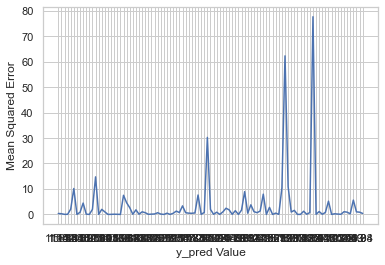

In [84]:
from matplotlib import pyplot
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (y_test[i] - y_pred[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
pyplot.xlabel('y_pred Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [85]:
from sklearn.metrics import explained_variance_score

explained_variance_score( y_pred,y_test)

0.8093533986495046

# PREDICTION

In [86]:
def predict_price(sex, age, address, Medu, Fedu, traveltime, failures,
       paid, higher, internet, goout, G1, G2):
   
    x = np.zeros(len(X.columns))
    x[0] = sex 
    x[1] = age
    x[2] = address 
    x[3] = Medu 
    x[4] = Fedu
    x[5] = traveltime 
    x[6] = failures
    x[7] = paid
    x[8] = higher 
    x[9] = internet
    x[10] =  goout
    x[11] =  G1
    x[12] =  G2
    
    
    
    return model.predict([x])[0]

In [87]:
predict_price(1,17, 1, 1,1,1, 1,
       0,1, 1,4, 4,1)

c:\Users\Arshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.34

# KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
model=model.fit(x_train,y_train)

In [89]:
y_pred=model.predict(x_test)

In [90]:
from sklearn.metrics import explained_variance_score

explained_variance_score( y_pred,y_test)

0.7311925351971211

In [91]:
accuracy = model.score(x_test, y_test)
accuracy

0.7438382282137699

In [92]:
y_test 

array([11, 15, 11, 11, 13,  8, 14, 16,  7,  0, 10, 12, 11, 11,  0, 16,  9,
       15, 14, 11, 15,  6, 11, 11, 12,  8, 11, 17, 10,  8,  0,  0, 17, 12,
        6,  7, 13, 10, 11, 13, 10, 16, 11, 16,  7, 10, 14, 13,  0, 11, 13,
        8,  9,  8,  8, 14, 14, 10,  8, 10,  9,  7,  0,  8,  6, 11,  5, 13,
        6, 15, 10, 18, 11,  0,  9, 13, 14,  8, 13,  8, 13, 12,  0,  7, 11,
       12,  9,  9, 14,  8, 15, 10,  0,  0, 11,  7, 16, 10, 10],
      dtype=int64)

>11.0, 11.8 = 0.640
>15.0, 14.0 = 1.000
>11.0, 11.0 = 0.000
>11.0, 10.6 = 0.160
>13.0, 13.4 = 0.160
>8.0, 4.8 = 10.240
>14.0, 14.4 = 0.160
>16.0, 15.6 = 0.160
>7.0, 5.0 = 4.000
>0.0, 0.0 = 0.000
>10.0, 10.6 = 0.360
>12.0, 8.6 = 11.560
>11.0, 7.8 = 10.240
>11.0, 11.6 = 0.360
>0.0, 0.0 = 0.000
>16.0, 15.8 = 0.040
>9.0, 9.8 = 0.640
>15.0, 14.8 = 0.040
>14.0, 13.6 = 0.160
>11.0, 9.6 = 1.960
>15.0, 14.6 = 0.160
>6.0, 5.8 = 0.040
>11.0, 12.8 = 3.240
>11.0, 10.6 = 0.160
>12.0, 12.2 = 0.040
>8.0, 7.4 = 0.360
>11.0, 11.0 = 0.000
>17.0, 17.0 = 0.000
>10.0, 11.2 = 1.440
>8.0, 9.6 = 2.560
>0.0, 0.0 = 0.000
>0.0, 0.0 = 0.000
>17.0, 16.4 = 0.360
>12.0, 9.6 = 5.760
>6.0, 6.2 = 0.040
>7.0, 6.2 = 0.640
>13.0, 11.8 = 1.440
>10.0, 10.4 = 0.160
>11.0, 12.2 = 1.440
>13.0, 12.0 = 1.000
>10.0, 11.0 = 1.000
>16.0, 15.6 = 0.160
>11.0, 12.8 = 3.240
>16.0, 15.0 = 1.000
>7.0, 8.2 = 1.440
>10.0, 5.4 = 21.160
>14.0, 13.8 = 0.040
>13.0, 13.8 = 0.640
>0.0, 6.6 = 43.560
>11.0, 10.6 = 0.160
>13.0, 13.2 = 0.040
>8.0, 7.

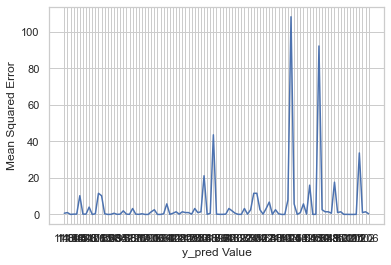

In [93]:
from matplotlib import pyplot
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (y_test[i] - y_pred[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
pyplot.xlabel('y_pred Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

# XG B

In [94]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [95]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[12:27:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
from sklearn.metrics import explained_variance_score

explained_variance_score( y_pred,y_test)

0.7311925351971211

In [97]:
accuracy = model.score(x_test, y_test)
accuracy

0.7438382282137699

>11.0, 11.8 = 0.640
>15.0, 14.0 = 1.000
>11.0, 11.0 = 0.000
>11.0, 10.6 = 0.160
>13.0, 13.4 = 0.160
>8.0, 4.8 = 10.240
>14.0, 14.4 = 0.160
>16.0, 15.6 = 0.160
>7.0, 5.0 = 4.000
>0.0, 0.0 = 0.000
>10.0, 10.6 = 0.360
>12.0, 8.6 = 11.560
>11.0, 7.8 = 10.240
>11.0, 11.6 = 0.360
>0.0, 0.0 = 0.000
>16.0, 15.8 = 0.040
>9.0, 9.8 = 0.640
>15.0, 14.8 = 0.040
>14.0, 13.6 = 0.160
>11.0, 9.6 = 1.960
>15.0, 14.6 = 0.160
>6.0, 5.8 = 0.040
>11.0, 12.8 = 3.240
>11.0, 10.6 = 0.160
>12.0, 12.2 = 0.040
>8.0, 7.4 = 0.360
>11.0, 11.0 = 0.000
>17.0, 17.0 = 0.000
>10.0, 11.2 = 1.440
>8.0, 9.6 = 2.560
>0.0, 0.0 = 0.000
>0.0, 0.0 = 0.000
>17.0, 16.4 = 0.360
>12.0, 9.6 = 5.760
>6.0, 6.2 = 0.040
>7.0, 6.2 = 0.640
>13.0, 11.8 = 1.440
>10.0, 10.4 = 0.160
>11.0, 12.2 = 1.440
>13.0, 12.0 = 1.000
>10.0, 11.0 = 1.000
>16.0, 15.6 = 0.160
>11.0, 12.8 = 3.240
>16.0, 15.0 = 1.000
>7.0, 8.2 = 1.440
>10.0, 5.4 = 21.160
>14.0, 13.8 = 0.040
>13.0, 13.8 = 0.640
>0.0, 6.6 = 43.560
>11.0, 10.6 = 0.160
>13.0, 13.2 = 0.040
>8.0, 7.

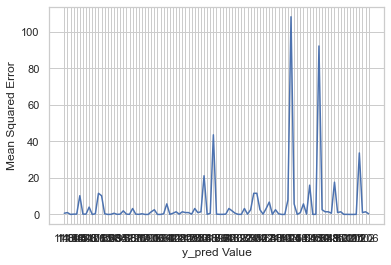

In [98]:
from matplotlib import pyplot
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (y_test[i] - y_pred[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
pyplot.xlabel('y_pred Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [99]:


from keras.models import Sequential
from keras.layers import Dense

# create ANN model
modelANN = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
modelANN.add(Dense(units=5, input_dim=13, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
modelANN.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
modelANN.add(Dense(1, kernel_initializer='normal'))




ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Compiling the model
modelANN.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
modelANN.fit(x_train, y_train ,batch_size = 20, epochs = 500, verbose=2)

Epoch 1/500
15/15 - 0s - loss: 3.5090
Epoch 2/500
15/15 - 0s - loss: 3.5609
Epoch 3/500
15/15 - 0s - loss: 3.4607
Epoch 4/500
15/15 - 0s - loss: 3.5093
Epoch 5/500
15/15 - 0s - loss: 3.4428
Epoch 6/500
15/15 - 0s - loss: 3.4382
Epoch 7/500
15/15 - 0s - loss: 3.4276
Epoch 8/500
15/15 - 0s - loss: 3.4416
Epoch 9/500
15/15 - 0s - loss: 3.4977
Epoch 10/500
15/15 - 0s - loss: 3.4597
Epoch 11/500
15/15 - 0s - loss: 3.4637
Epoch 12/500
15/15 - 0s - loss: 3.4591
Epoch 13/500
15/15 - 0s - loss: 3.4775
Epoch 14/500
15/15 - 0s - loss: 3.4296
Epoch 15/500
15/15 - 0s - loss: 3.4359
Epoch 16/500
15/15 - 0s - loss: 3.4687
Epoch 17/500
15/15 - 0s - loss: 3.5146
Epoch 18/500
15/15 - 0s - loss: 3.6393
Epoch 19/500
15/15 - 0s - loss: 3.4331
Epoch 20/500
15/15 - 0s - loss: 3.5064
Epoch 21/500
15/15 - 0s - loss: 3.4296
Epoch 22/500
15/15 - 0s - loss: 3.4599
Epoch 23/500
15/15 - 0s - loss: 3.4047
Epoch 24/500
15/15 - 0s - loss: 3.4636
Epoch 25/500
15/15 - 0s - loss: 3.4720
Epoch 26/500
15/15 - 0s - loss: 3.

In [ ]:
y_pred_ANN = model.predict(x_test)

In [ ]:
explained_variance_score( y_pred_ANN,y_test)

0.263445516124041